### Información general del dataset
---

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor

# Definimos el dataframe
df = pd.read_csv('Student Depression Dataset.csv')

""" Ya que el dataset esta basado en estudiantes los registros que tienen valores en las columnas 'Job Satisfaction' 
 y 'Work Pressure' son muy pocos, para mayor claridad en el dataset se dropean estas columnas. """
df = df.drop(['Job Satisfaction', 'Work Pressure'], axis=1)

# Creamos un dataframe con solo las personas que tienen depresion.
df_depre = df[df['Depression'] == 1]

In [119]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [120]:
df.describe()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,7.656104,2.943837,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,1.470707,1.361148,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000


In [121]:
# Buscamos valores nulos en el dataset y los eliminamos
print(list(df.isnull().sum()))
# En este caso solo posee 3 valores nulos en una columna
df = df.dropna()
print(list(df.isnull().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Tamaño del dataset
---

In [122]:
# Definimos variables
count_people = len(df)
count_dep_people = len(df_depre)

# Mostramos respuestas
print(f'Numero de personas en el dataset: \t\t\t{count_people}') # Cuanta gente hay en el dataset?
print(f'Numero de personas con depresion en el dataset: \t{count_dep_people}') # Cuanta gente con depresion hay en el dataset?
print(f'% de personas que estan deprimidas en el dataset: \t{round(count_dep_people / count_people * 100, 2)}%') # % de gente tiene depresion en el dataset?

Numero de personas en el dataset: 			27898
Numero de personas con depresion en el dataset: 	16336
% de personas que estan deprimidas en el dataset: 	58.56%


### Depresión por género
---

Numero de mujeres con depresion: 	7221
Numero de hombres con depresion: 	9115
% de mujeres deprimidas: 		25.88%
% de hombres deprimidos: 		32.67%


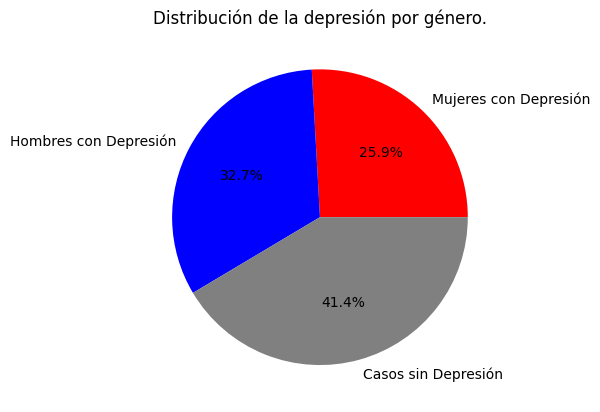

In [123]:
# Definimos variables
female_dep_count = df_depre['Gender'].value_counts().get('Female')
male_dep_count = df_depre['Gender'].value_counts().get('Male')
percent_of_dep_females = female_dep_count / count_people
percent_of_dep_males = male_dep_count / count_people

# Mostramos respuestas
print(f'Numero de mujeres con depresion: \t{female_dep_count}') # Cuantas mujeres tienen depresion?
print(f'Numero de hombres con depresion: \t{male_dep_count}') # Cuantos hombres tienen depresion?
print(f'% de mujeres deprimidas: \t\t{round(percent_of_dep_females * 100, 2)}%') # Que % de mujeres tiene depresion?
print(f'% de hombres deprimidos: \t\t{round(percent_of_dep_males * 100, 2)}%') # Que porcentaje de hombres tiene depresion?

# Representacion
fig, ax = plt.subplots()
ax.set_title('Distribución de la depresión por género.')
ax.pie([percent_of_dep_females * 100, percent_of_dep_males * 100, (1 - percent_of_dep_males - percent_of_dep_females) * 100],
        labels=['Mujeres con Depresión', 'Hombres con Depresión', 'Casos sin Depresión'],  
        autopct='%1.1f%%',
        colors=['red', 'blue', 'gray']);

### Depresión por edad
---

El rango de edad con mas depresion es [20, 21, 22, 23, 24] con un total de 9025 casos dentro del dataset.
Esto representa el 32.35% de los casos en el dataset y el 55.25% de los casos con depresion.

La edad con mas casos de depresion asociados es 24 con un total de 2258 casos dentro del dataset.
Esto representa el 8.09% de los casos en el dataset y el 13.82% de los casos con depresion.


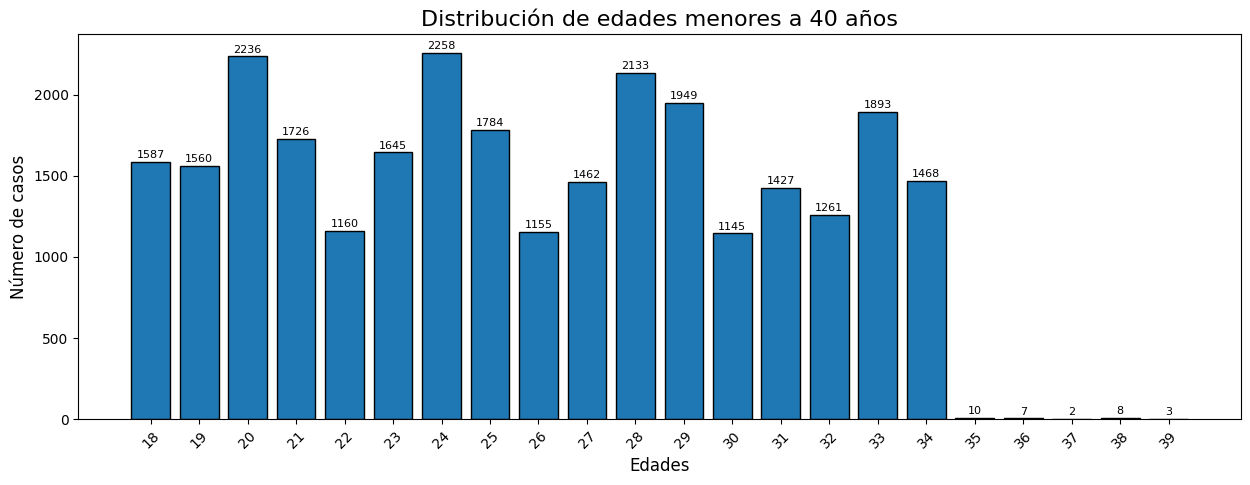

In [124]:
# Definimos variables
float_unique_ages: list = df['Age'].unique()
unique_ages: dict = {}
for age in float_unique_ages: unique_ages[int(age)] = 0
for age in df['Age']: 
    if int(age) in unique_ages: unique_ages[int(age)] += 1

max_age_key = max(unique_ages, key=unique_ages.get)
max_age_value = unique_ages[24]

age_range = []
cases_in_range = 0
keys = sorted(unique_ages.keys())
for x in range(len(unique_ages) - 4):
    actual_range = [keys[x], keys[x+1], keys[x+2], keys[x+3], keys[x+4]]
    sum_range = 0
    for age in actual_range:
        sum_range += unique_ages[age] 
    if sum_range > cases_in_range:
        age_range = actual_range
        cases_in_range = sum_range

# Mostramos respuestas
print(f'El rango de edad con mas depresion es {age_range} con un total de {cases_in_range} casos dentro del dataset.')
print(f'Esto representa el {round(cases_in_range / count_people * 100, 2)}% de los casos en el dataset y el {round(cases_in_range / count_dep_people * 100, 2)}% de los casos con depresion.', end='\n\n')
print(f'La edad con mas casos de depresion asociados es {max_age_key} con un total de {max_age_value} casos dentro del dataset.')
print(f'Esto representa el {round(max_age_value / count_people * 100, 2)}% de los casos en el dataset y el {round(max_age_value / count_dep_people * 100, 2)}% de los casos con depresion.')

# Representacion, se muestran solo los datos para edades menores a 40 años ya que el numero de casos por encima de este umbral es minimo (casos<50)
filtered_ages = {age: count for age, count in unique_ages.items() if age < 40}
plt.figure(figsize=(15, 5))
plt.bar(filtered_ages.keys(), filtered_ages.values(), align='center', width=0.8, edgecolor='black')
plt.xticks(ticks=list(filtered_ages.keys()), rotation=45)
plt.title('Distribución de edades menores a 40 años', fontsize=16)
plt.xlabel('Edades', fontsize=12)
plt.ylabel('Número de casos', fontsize=12)
for x, y in zip(filtered_ages.keys(), filtered_ages.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)

plt.show()

### Presión de estudios y finanzas.
---

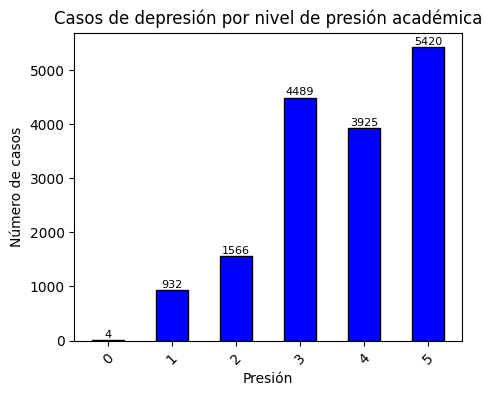

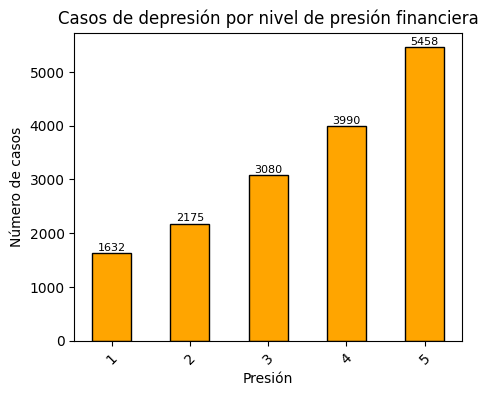

In [125]:
# Definimos variables
unique_academic_pressure_values = df_depre['Academic Pressure'].unique()
unique_financial_pressure_values = df_depre['Financial Stress'].unique()

academic_stress_dict: dict = {}
financial_stress_dict: dict = {}

for uapv in sorted(unique_academic_pressure_values): academic_stress_dict[int(uapv)] = 0
for ufpv in sorted(unique_financial_pressure_values): 
    if ufpv in [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]:
        financial_stress_dict[int(ufpv)] = 0

for value in df_depre['Academic Pressure']:
    if value in academic_stress_dict: academic_stress_dict[value] += 1
for value in df_depre['Financial Stress']:
    if value in financial_stress_dict: financial_stress_dict[value] += 1

# Representacion
plt.figure(figsize=(5, 4))
plt.bar(academic_stress_dict.keys(), academic_stress_dict.values(), align='center', width=0.5, color='blue', edgecolor='black')
plt.xticks(ticks=list(academic_stress_dict.keys()), rotation=45)
plt.title('Casos de depresión por nivel de presión académica', fontsize=12)
plt.xlabel('Presión', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(academic_stress_dict.keys(), academic_stress_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

plt.figure(figsize=(5, 4))
plt.bar(financial_stress_dict.keys(), financial_stress_dict.values(), align='center', width=0.5, color='orange', edgecolor='black')
plt.xticks(ticks=list(financial_stress_dict.keys()), rotation=45)
plt.title('Casos de depresión por nivel de presión financiera', fontsize=12)
plt.xlabel('Presión', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(financial_stress_dict.keys(), financial_stress_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

### Satisfacción y resultados en los estudios.
---

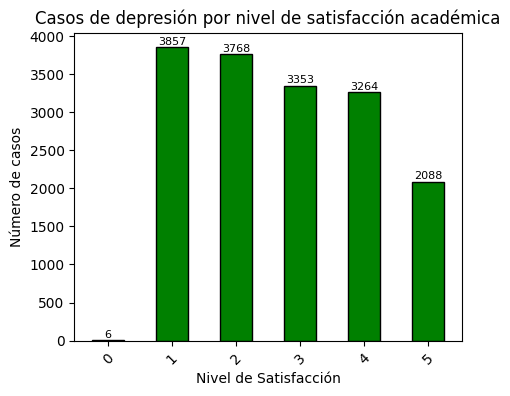

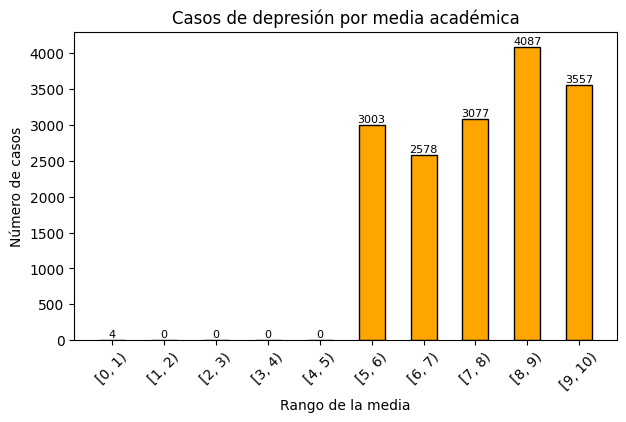

In [126]:
# Definimos variables
unique_satisfaction_values = df_depre['Study Satisfaction'].unique()
satisfaction_dict: dict = {}
for satisfaction in sorted(unique_satisfaction_values): satisfaction_dict[int(satisfaction)] = 0

for value in df_depre['Study Satisfaction']:
    if value in academic_stress_dict: satisfaction_dict[value] += 1

cgpa_dict = {}
for x in range(10):
    cgpa_dict[f'[{x}, {x+1})'] = 0

for val in df_depre['CGPA']:
    index = floor(val)
    key = f'[{index}, {index+1})'
    if key in cgpa_dict:
        cgpa_dict[key] += 1

# Representacion
plt.figure(figsize=(5, 4))
plt.bar(satisfaction_dict.keys(), satisfaction_dict.values(), align='center', width=0.5, color='green', edgecolor='black')
plt.xticks(ticks=list(satisfaction_dict.keys()), rotation=45)
plt.title('Casos de depresión por nivel de satisfacción académica', fontsize=12)
plt.xlabel('Nivel de Satisfacción', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(satisfaction_dict.keys(), satisfaction_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

plt.figure(figsize=(7, 4))
plt.bar(cgpa_dict.keys(), cgpa_dict.values(), align='center', width=0.5, color='orange', edgecolor='black')
plt.xticks(ticks=list(cgpa_dict.keys()), rotation=45)
plt.title('Casos de depresión por media académica', fontsize=12)
plt.xlabel('Rango de la media', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(cgpa_dict.keys(), cgpa_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

### Hábitos de alimentación y sueño.
---

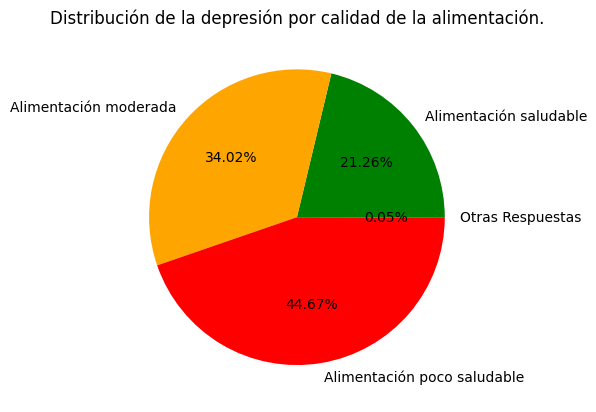

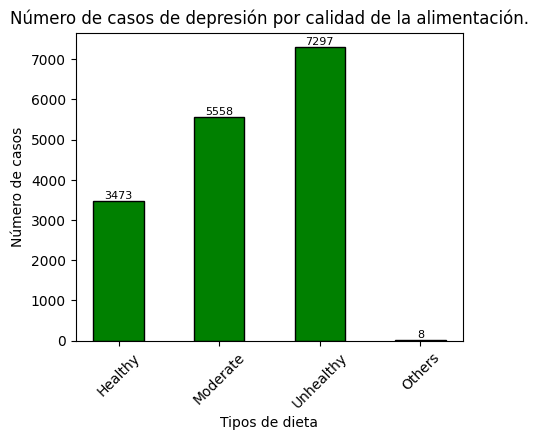

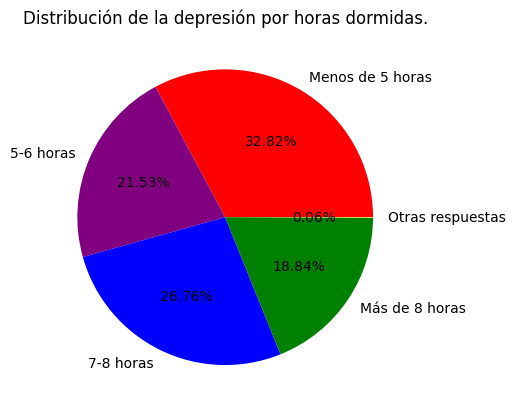

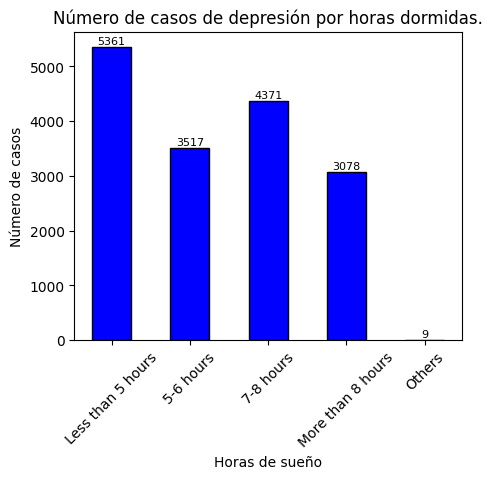

In [127]:
# Definimos nuestras variables
diet_dict: dict = {}
sleep_dict: dict = {}

unique_diet = df['Dietary Habits'].unique()
unique_sleep = df['Sleep Duration'].unique()
unique_sleep[0], unique_sleep[1] = unique_sleep[1], unique_sleep[0] # Ajuste en el orden de las horas

# Definimos las keys de los diccionarios
for unique_val in unique_diet: diet_dict[unique_val] = 0
for unique_val in unique_sleep: sleep_dict[unique_val] = 0
# Contamos los casos por key
for diet in df_depre['Dietary Habits']: diet_dict[diet] += 1
for sleep in df_depre['Sleep Duration']: sleep_dict[sleep] += 1

# Representacion
fig, ax = plt.subplots()
ax.set_title('Distribución de la depresión por calidad de la alimentación.')
ax.pie([diet_dict[unique_diet[0]], diet_dict[unique_diet[1]], diet_dict[unique_diet[2]], diet_dict[unique_diet[3]]], # ['Healthy' 'Moderate' 'Unhealthy' 'Others']
        labels= ['Alimentación saludable', 'Alimentación moderada', 'Alimentación poco saludable', 'Otras Respuestas'],
        autopct='%1.2f%%',
        colors=['green', 'orange', 'red', 'blue']);
plt.show()
plt.figure(figsize=(5, 4))
plt.bar(diet_dict.keys(), diet_dict.values(), align='center', width=0.5, color='green', edgecolor='black')
plt.xticks(ticks=list(diet_dict.keys()), rotation=45)
plt.title('Número de casos de depresión por calidad de la alimentación.', fontsize=12)
plt.xlabel('Tipos de dieta', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(diet_dict.keys(), diet_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

fig, ax = plt.subplots()
ax.set_title('Distribución de la depresión por horas dormidas.')
ax.pie([sleep_dict[unique_sleep[0]], sleep_dict[unique_sleep[1]], sleep_dict[unique_sleep[2]], sleep_dict[unique_sleep[3]], sleep_dict[unique_sleep[4]]],
        labels= ['Menos de 5 horas', '5-6 horas', '7-8 horas', 'Más de 8 horas', 'Otras respuestas'],
        autopct='%1.2f%%',
        colors=['red', 'purple', 'blue', 'green', 'yellow']);
plt.show()
plt.figure(figsize=(5, 4))
plt.bar(sleep_dict.keys(), sleep_dict.values(), align='center', width=0.5, color='blue', edgecolor='black')
plt.xticks(ticks=list(sleep_dict.keys()), rotation=45)
plt.title('Número de casos de depresión por horas dormidas.', fontsize=12)
plt.xlabel('Horas de sueño', fontsize=10)
plt.ylabel('Número de casos', fontsize=10)
for x, y in zip(sleep_dict.keys(), sleep_dict.values()):
    plt.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=8)
plt.show()

### Otros factores
---

Numero de casos que han tenido pensamientos suicidas: 13957 de los 16336 casos de depresion totales.


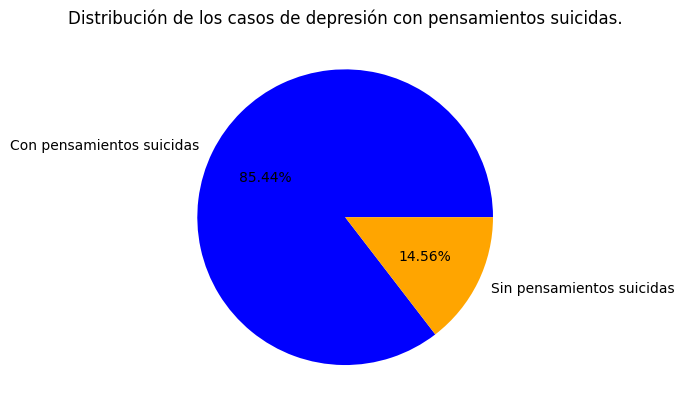

Numero de casos con historial de depresion en la familia:  8273 de los 16336 casos de depresion totales.


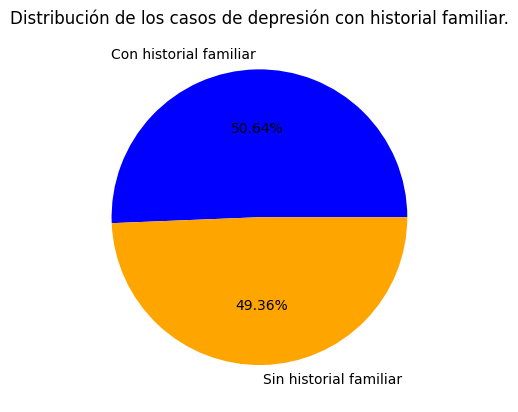

In [128]:
# Definimos las variables
num_sucidal = 0
num_family_history = 0

for val in df_depre['Have you ever had suicidal thoughts ?']:
    if val == 'Yes': num_sucidal += 1
for val in df_depre['Family History of Mental Illness']:
    if val == 'Yes': num_family_history += 1

# Mostramos las respuestas
print(f'Numero de casos que han tenido pensamientos suicidas: {num_sucidal} de los {count_dep_people} casos de depresion totales.')
# Representacion
fig, ax = plt.subplots()
ax.set_title('Distribución de los casos de depresión con pensamientos suicidas.')
ax.pie([num_sucidal, count_dep_people - num_sucidal],
        labels= ['Con pensamientos suicidas', 'Sin pensamientos suicidas'],
        autopct='%1.2f%%',
        colors=['blue', 'orange']);
plt.show()

# Mostramos respuestas
print(f'Numero de casos con historial de depresion en la familia:  {num_family_history} de los {count_dep_people} casos de depresion totales.')
# Representacion
fig, ax = plt.subplots()
ax.set_title('Distribución de los casos de depresión con historial familiar.')
ax.pie([num_family_history, count_dep_people - num_family_history],
        labels= ['Con historial familiar', 'Sin historial familiar'],
        autopct='%1.2f%%',
        colors=['blue', 'orange']);
plt.show()

### Correlación de las variables
---

In [138]:
df_encoded = pd.get_dummies(df)
corr_matrix = df_encoded.corr()
corr_depresion = corr_matrix['Depression']
for val in corr_depresion:
    print(corr_depresion)

id                                           0.000986
Age                                         -0.226511
Academic Pressure                            0.474793
CGPA                                         0.022268
Study Satisfaction                          -0.168010
                                               ...   
Degree_PhD                                  -0.010549
Have you ever had suicidal thoughts ?_No    -0.546290
Have you ever had suicidal thoughts ?_Yes    0.546290
Family History of Mental Illness_No         -0.053554
Family History of Mental Illness_Yes         0.053554
Name: Depression, Length: 117, dtype: float64
id                                           0.000986
Age                                         -0.226511
Academic Pressure                            0.474793
CGPA                                         0.022268
Study Satisfaction                          -0.168010
                                               ...   
Degree_PhD                          